In [78]:
%matplotlib notebook

[('0', '1'), ('0', '3'), ('0', '8'), ('1', '2'), ('1', '3'), ('1', '5'), ('1', '6'), ('1', '8'), ('1', '9'), ('2', '3'), ('2', '4'), ('2', '7'), ('2', '8'), ('3', '5'), ('3', '8'), ('3', '9'), ('4', '5'), ('4', '9'), ('5', '6'), ('5', '7'), ('5', '8'), ('6', '7'), ('6', '8'), ('7', '8'), ('7', '9'), ('8', '9'), ('10', '15'), ('10', '16'), ('10', '18'), ('10', '19'), ('11', '14'), ('11', '15'), ('11', '16'), ('11', '18'), ('12', '13'), ('12', '15'), ('12', '16'), ('12', '17'), ('12', '19'), ('13', '14'), ('13', '18'), ('13', '19'), ('14', '15'), ('14', '16'), ('14', '18'), ('14', '19'), ('15', '18'), ('15', '19'), ('16', '18'), ('17', '18'), ('18', '19')]


<IPython.core.display.Javascript object>


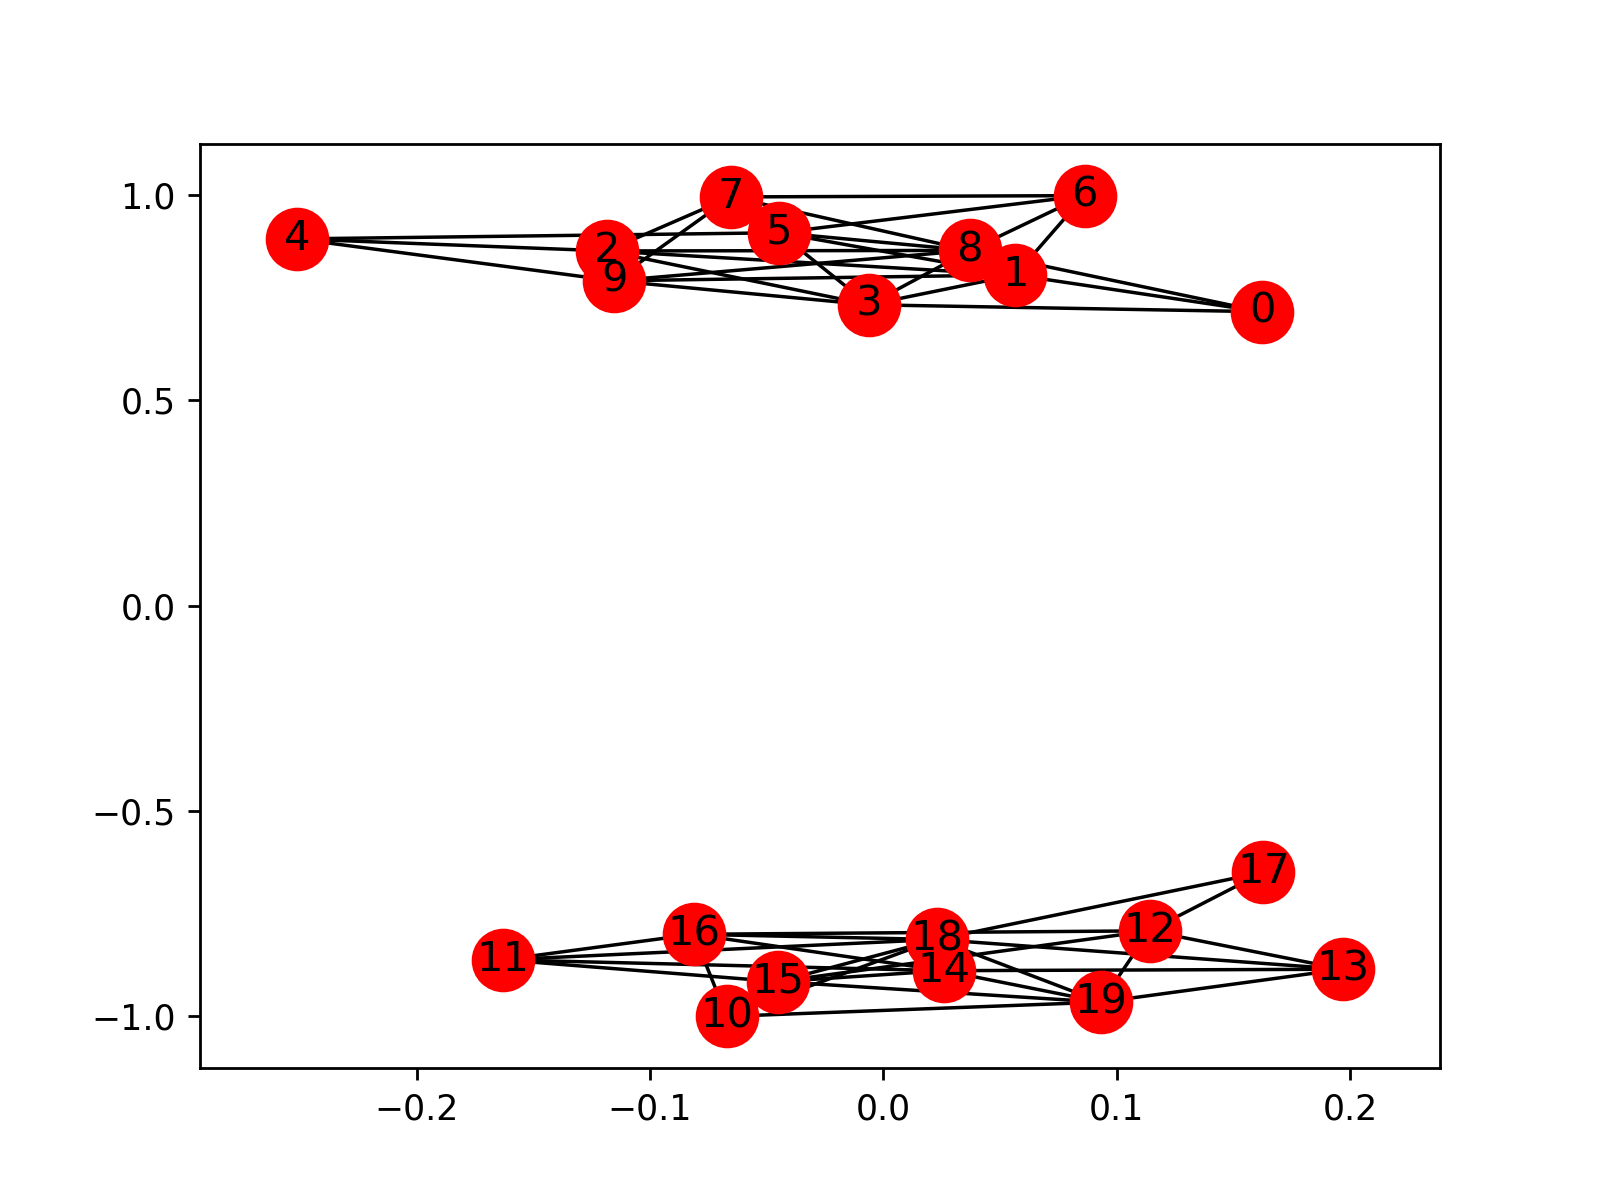

In [91]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

n = 20

V = [str(i) for i in range(n)]
E = []

for j in range(int(len(V)/2)):
	for k in range(j+1,int(len(V)/2)):
		if (random.random() > 0.5):
			E.append((str(j),str(k)))

E3 = []
for j in range(int(len(V)/2), len(V)):
	for k in range(j+1,len(V)):
		if (random.random() > 0.5):
			E3.append((str(j),str(k)))

E.extend(E3)
print(E)
#E.append(("17", "8"))

G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

nx.draw_networkx(G)

In [92]:
"5" in G.nodes

True

In [94]:
largest_cc = max(nx.connected_components(G), key=len)


In [100]:
for cc in nx.connected_components(G):
    print(cc)
    if "11" in cc:
        nodes = cc
        print("Nodes: ", nodes)
        
Gcomp = nx.Graph()
Gcomp.add_nodes_from(nodes)
#Gcomp.add_edges_from(E)

Etemp = []
for edge in G.edges:
    if edge[0] in nodes and edge[1] in nodes:
        print(edge, " is in induced subgraph")
        Etemp.append(edge)
        
print(Etemp)

Gcomp.add_edges_from(Etemp)

{'9', '8', '5', '2', '4', '0', '1', '3', '6', '7'}
{'11', '18', '15', '10', '13', '16', '12', '14', '17', '19'}
Nodes:  {'11', '18', '15', '10', '13', '16', '12', '14', '17', '19'}
('10', '15')  is in induced subgraph
('10', '16')  is in induced subgraph
('10', '18')  is in induced subgraph
('10', '19')  is in induced subgraph
('11', '14')  is in induced subgraph
('11', '15')  is in induced subgraph
('11', '16')  is in induced subgraph
('11', '18')  is in induced subgraph
('12', '13')  is in induced subgraph
('12', '15')  is in induced subgraph
('12', '16')  is in induced subgraph
('12', '17')  is in induced subgraph
('12', '19')  is in induced subgraph
('13', '14')  is in induced subgraph
('13', '18')  is in induced subgraph
('13', '19')  is in induced subgraph
('14', '15')  is in induced subgraph
('14', '16')  is in induced subgraph
('14', '18')  is in induced subgraph
('14', '19')  is in induced subgraph
('15', '18')  is in induced subgraph
('15', '19')  is in induced subgraph
('16'

In [63]:
nx.degree_histogram(G)

[0, 0, 0, 5, 8, 5, 2]

In [74]:
V2 = [str(i) for i in range(4)]
E2 = [(str(i),str(j)) for i in range(4) for j in range(i+1,4)]

G2 = nx.Graph()
G2.add_nodes_from(V2)
G2.add_edges_from(E2)

nx.draw(G2)
plt.show()

In [75]:
nx.degree_histogram(G2)

[0, 0, 0, 4]

In [76]:
nx.core_number(G2)

{'0': 3, '1': 3, '2': 3, '3': 3}

In [25]:
d = nx.node_clique_number(G, nodes=[str(i) for i in range(10)])
d

{'0': 3,
 '1': 4,
 '2': 3,
 '3': 3,
 '4': 4,
 '5': 4,
 '6': 3,
 '7': 4,
 '8': 3,
 '9': 4}

In [47]:
nx.laplacian_spectrum(G)

array([ -8.24071535e-16,   1.34454855e-01,   1.64532741e+00,
         2.19918536e+00,   2.34180408e+00,   3.31576192e+00,
         4.02795370e+00,   4.07789374e+00,   4.64699519e+00,
         4.77596371e+00,   5.00000000e+00,   5.27848204e+00,
         5.48536307e+00,   6.18161070e+00,   6.33183968e+00,
         6.78460076e+00,   7.47512569e+00,   7.48482869e+00,
         8.10663765e+00,   8.70617176e+00])

In [15]:
import math

def medianNumberOfInterference(G):
    degrees = nx.degree_histogram(G)
    degreeSequence = [i for i in range(len(degrees)) for j in range(degrees[i])]
    if len(degreeSequence) != len(G.nodes):
        print("Degree sequence does not have the correct length")
    length = len(degreeSequence)
    if length % 2 == 0:
        return (degreeSequence[int(length/2)] + degreeSequence[int((length/2)+1)])/2
    else:
        return (degreeSequence[int(math.ceil(length/2))])

print(medianNumberOfInterference(G))

4.0


In [16]:
nx.laplacian_spectrum(G)

array([  5.45737505e-16,   1.34207236e+00,   2.17418962e+00,
         2.83603074e+00,   3.26504952e+00,   4.31392200e+00,
         5.20111215e+00,   5.84540098e+00,   6.23836772e+00,
         6.78385491e+00])

In [4]:
print(nx.degree_histogram(G))
print(nx.degree(G))

hist = nx.degree_histogram(G)
print(hist)

L = [i*hist[i] for i in range(len(hist))]
print(L)
avgDegree = sum(L)/len(G.nodes)
print(avgDegree)

avgDegree2 = 0
for v in G.nodes:
    avgDegree2 += nx.degree(G,v)

print(avgDegree2/len(G.nodes))

[0, 0, 0, 2, 1, 2, 5]
[('0', 5), ('1', 6), ('2', 3), ('3', 6), ('4', 5), ('5', 6), ('6', 3), ('7', 6), ('8', 6), ('9', 4)]
[0, 0, 0, 2, 1, 2, 5]
[0, 0, 0, 6, 4, 10, 30]
5.0
5.0


Let us create some functions such as average degree, maximum degree and other properties that we want to add to our instances to get more data.

In [9]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[9, 1]

In [10]:
largest_cc = max(nx.connected_components(G), key=len)
largest_cc

G1 = nx.Graph()
G1.add_nodes_from(largest_cc)

E1 = []
for e in G.edges():
    if e[0] in largest_cc and e[1] in largest_cc:
        E1.append(e)
        
G1.add_edges_from(E1)

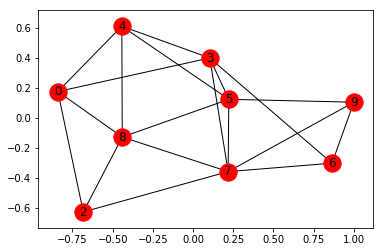

In [11]:
nx.draw_networkx(G1)
plt.savefig("litengraf.png")

[  5.55111512e-17   4.95702306e-01   7.72610502e-01   9.01578764e-01
   1.59779015e+00   1.14745865e+00   1.25181531e+00   1.44833292e+00
   1.38471139e+00]
Largest eigenvalue: 1.59779015419
Smallest eigenvalue: 5.55111512313e-17


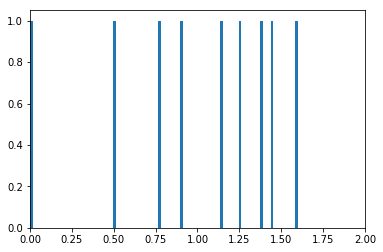

In [24]:
L = nx.normalized_laplacian_matrix(G1)
#print(L)
e = np.linalg.eigvals(L.A)
print(e)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

In [29]:
G = nx.read_graphml("/Users/haakonhr/Dropbox/TUM/Masteroppgave/FCC/graphml/44-136565.graphml")

In [35]:
largest_cc = max(nx.connected_components(G))

G1 = nx.Graph()
G1.add_nodes_from(largest_cc)

E1 = []
for e in G.edges():
    if e[0] in largest_cc and e[1] in largest_cc:
        E1.append(e)
        
G1.add_edges_from(E1)

In [36]:
print(G1.number_of_edges())
print(G1.number_of_nodes())

20367
1230


[ -6.98226199e-17   3.30664516e-03   9.36245487e-03 ...,   1.04545455e+00
   1.04545455e+00   1.04545455e+00]
Largest eigenvalue: 1.85995454787
Smallest eigenvalue: -6.98226199081e-17


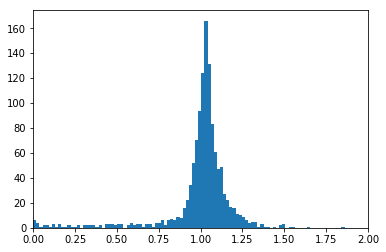

In [38]:
L = nx.normalized_laplacian_matrix(G1)
#print(L)
e = np.linalg.eigvals(L.A)
print(e)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()